In [1]:
from gaussians import Gaussian

In [2]:
import torch

from matplotlib import pyplot as plt
import numpy as np

In [3]:
from ubvi import UBVI

In [25]:
example_log_pdf_0 = lambda x: -((x - 1) ** 2).sum(dim=-1) / 2

In [30]:
example_log_pdf_1 = lambda x: -torch.log(1 + (x ** 2).sum(dim=-1))

In [33]:
test = UBVI(example_log_pdf_1, Gaussian(1), num_opt_steps=1000, n_samples=1000, n_init=100, init_inflation=100)

In [34]:
test.build(10)

Initializing component 1... 
          Iteration           |          Best param          |        Best objective        
              0               | tensor([-46.2004,   0.0000]) |        tensor(3.0168)        
              99              |  tensor([-2.3787,  0.0000])  |        tensor(0.0322)        
Initialization of component 1 complete, x0 = tensor([-2.3787,  0.0000])
Optimizing component 1... 
Optimization of component 1 complete
Updating weights...
Weight update complete...
Component 1:
Hellinger Dist Sq: tensor(0.0218, grad_fn=<RsubBackward1>)
Params:{'mus': tensor([[-0.0152]], grad_fn=<SliceBackward>), 'sigmas': tensor([[3.7639]], grad_fn=<ExpBackward>)}
Weights: tensor([1.])
Initializing component 2... 
          Iteration           |          Best param          |        Best objective        
              0               |tensor([19.8012, -0.2463], grad_fn=<CatBackward>)|tensor(2.2928, grad_fn=<NegBackward>)
              99              |tensor([8.7076, 2.3745], grad_

Optimization of component 8 complete
Updating weights...
tensor([[1.0000e+00, 3.2844e-01, 1.7805e-01, 6.1588e-04, 5.9899e-01, 1.9935e-05,
         9.1155e-01, 8.0617e-01],
        [3.2844e-01, 1.0000e+00, 7.7964e-02, 5.3868e-04, 1.3624e-01, 5.9102e-02,
         2.5518e-01, 2.1523e-01],
        [1.7805e-01, 7.7964e-02, 1.0000e+00, 7.7440e-02, 6.4504e-02, 4.6783e-06,
         1.0423e-01, 3.0452e-01],
        [6.1588e-04, 5.3868e-04, 7.7440e-02, 1.0000e+00, 1.7238e-04, 1.1913e-08,
         2.8757e-04, 1.3958e-03],
        [5.9899e-01, 1.3624e-01, 6.4504e-02, 1.7238e-04, 1.0000e+00, 2.8461e-06,
         7.4636e-01, 3.9585e-01],
        [1.9935e-05, 5.9102e-02, 4.6783e-06, 1.1913e-08, 2.8461e-06, 1.0000e+00,
         8.8923e-06, 4.6652e-06],
        [9.1155e-01, 2.5518e-01, 1.0423e-01, 2.8757e-04, 7.4636e-01, 8.8923e-06,
         1.0000e+00, 5.8355e-01],
        [8.0617e-01, 2.1523e-01, 3.0452e-01, 1.3958e-03, 3.9585e-01, 4.6652e-06,
         5.8355e-01, 1.0000e+00]], grad_fn=<CopySlices>)


{'mus': tensor([[-1.5221e-02],
         [ 1.0862e+00],
         [-1.8408e+00],
         [-2.6198e+00],
         [-1.6983e-02],
         [ 4.0143e+00],
         [ 3.2596e-01],
         [-1.3022e+00],
         [ 3.7464e+00],
         [ 2.6363e-01],
         [ 1.0862e+00],
         [ 1.1561e+01],
         [-3.3711e+00],
         [-9.0346e+00],
         [ 2.4729e-02],
         [ 2.6063e+01],
         [ 7.7883e-01],
         [-1.2451e+00],
         [ 4.4300e+00],
         [ 1.0201e+00],
         [-1.8408e+00],
         [-3.3711e+00],
         [-1.2778e+01],
         [-2.0892e+01],
         [-8.9973e-02],
         [ 8.3874e+00],
         [-2.1322e-01],
         [-3.9458e+00],
         [ 3.8947e+00],
         [-6.8497e-01],
         [-2.6198e+00],
         [-9.0346e+00],
         [-2.0892e+01],
         [-4.0683e+01],
         [-1.1264e-01],
         [ 9.3487e+00],
         [-4.1533e-01],
         [-4.8799e+00],
         [ 3.8546e+00],
         [-1.0627e+00],
         [-1.6983e-02],
         

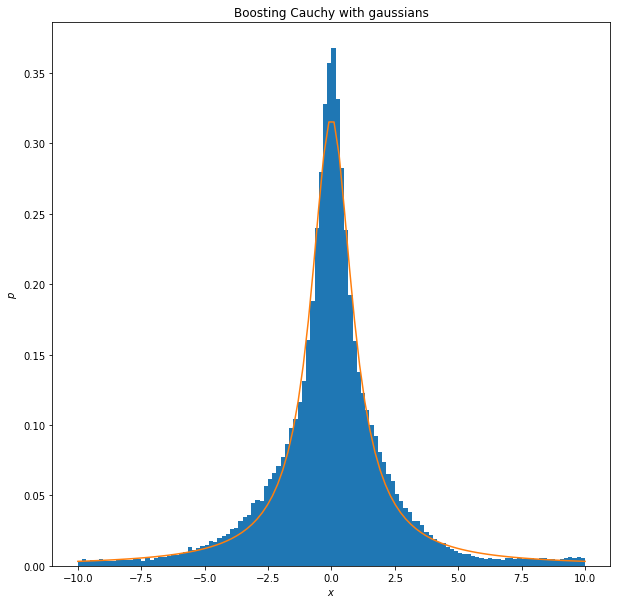

In [39]:
samples = test._sample_g(100000).detach().numpy().flatten()

plt.figure(figsize=(10, 10))

plt.hist(samples, density=True, bins=120, range=[-10, 10])

grid = np.linspace(-10, 10, 100)
plt.plot(grid, (1 / np.pi) / (1 + grid ** 2))

plt.title('Boosting Cauchy with gaussians')
plt.ylabel(r'$p$')
plt.xlabel(r'$x$')

plt.show()

In [10]:
test_b = torch.tensor([2, 3])

In [11]:
test_b.expand_as(test_a)

tensor([[2, 3],
        [2, 3]])

In [10]:
torch.tensor(3, dtype=torch.float32)

tensor(3.)

In [15]:
test = torch.tensor([1., 2])

In [16]:
test.requires_grad

False

In [17]:
test.requires_grad_()

tensor([1., 2.], requires_grad=True)

In [18]:
test.requires_grad

True

In [8]:
x = torch.tensor([[1., 2], [2, 3]], requires_grad=True)

In [9]:
torch.optim.Adam([x])

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [9]:
x.dot(torch.Tensor([1, 2]))

RuntimeError: 1D tensors expected, got 2D, 1D tensors at ../aten/src/TH/generic/THTensorEvenMoreMath.cpp:774